# Read volume, show slice and write png

In [1]:
import SimpleITK as sitk
from matplotlib import pyplot as plt

In [2]:
#file path
fn_hist = "../data/hist_rgb.nii.gz"
fn_slice = "../data/hist_rgb_10.png"

In [3]:
#histology volume
im_hist= sitk.ReadImage(fn_hist,sitk.sitkVectorUInt8)
print(im_hist.GetSize(), im_hist.GetSpacing(), im_hist.GetNumberOfComponentsPerPixel())

(2048, 2048, 25) (0.09764999896287918, 0.09764999896287918, 4.199999809265137) 3


In [4]:
slice_idx = 10
slice_hist = im_hist[:,:,slice_idx]

arr = sitk.GetArrayFromImage(im_hist)
slice_hist_arr = arr[slice_idx,:,:,:]

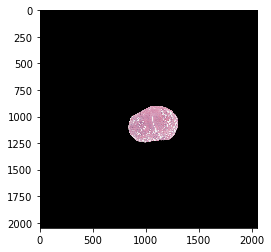

In [5]:
plt.imshow(slice_hist_arr); plt.show()

In [6]:
sitk.WriteImage(slice_hist, fn_slice)

# Apply Transform

In [7]:
#Rotate image by 5 deg
import numpy as np
from scipy import ndimage

deg = 45
rad = np.deg2rad(deg)

In [8]:
mode = 2 # 1 -rotate around geometric center
         # 2 - rotate around center of mass
    
rotation = sitk.Euler2DTransform()
rotation.SetAngle(rad)
if mode==1:
    center = [o+s*sp/2.0 for o,s,sp in zip(slice_hist.GetOrigin(), slice_hist.GetSize(),slice_hist.GetSpacing())]
else:
    arr_slice = sitk.GetArrayFromImage(slice_hist)
    pix_center_of_mass = ndimage.measurements.center_of_mass(arr_slice)
    center = [o+c*sp for o,c,sp in zip(slice_hist.GetOrigin(), pix_center_of_mass,slice_hist.GetSpacing())]

rotation.SetCenter(center)

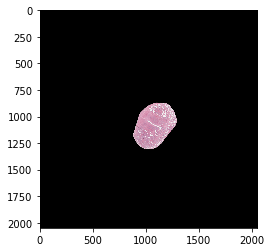

In [9]:
im_hist_rot = sitk.Resample(slice_hist, rotation, sitk.sitkLinear,0)
plt.imshow(sitk.GetArrayFromImage(im_hist_rot)); plt.show()

In [11]:
fn_slice=fn_slice = "../data/hist_rgb_10_rot.png"
sitk.WriteImage(im_hist_rot, fn_slice)